
The workflow of this code consists of three parts:
1. Data Cleaning - handling of missing data, coverting categorical features to numerical
2. Exploratory Data Analysis - understanding summary statistics and visualizing distribution and relationships
3. Machine Learning Models - model selection, optimization, evaluation and comparison.

# PART I: DATA CLEANING (converting data types, removing nulls & duplicates, etc)

In [145]:
# Import Python Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from scipy import stats

#Import dependencies for Machine Models
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector as selector
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Ignore all warning messages
warnings.filterwarnings('ignore')

In [146]:
# Downloading 'movie_metadata.csv' from the Resources folder in our GitHub repository.
!wget https://github.com/LegallyNotBlonde/Movie_Analysis/raw/refs/heads/main/Resources/movie_metadata.csv

--2024-12-21 08:25:13--  https://github.com/LegallyNotBlonde/Movie_Analysis/raw/refs/heads/main/Resources/movie_metadata.csv
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LegallyNotBlonde/Movie_Analysis/refs/heads/main/Resources/movie_metadata.csv [following]
--2024-12-21 08:25:13--  https://raw.githubusercontent.com/LegallyNotBlonde/Movie_Analysis/refs/heads/main/Resources/movie_metadata.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1489644 (1.4M) [text/plain]
Saving to: ‘movie_metadata.csv.3’

movie_metadata.csv. 100%[===================>]   1.42M  --.-KB/s    in 0.01s   

2024-12-21 0

In [147]:
# Set the file path to the downloaded file
file_path = 'movie_metadata.csv'
# Load the original data from the CSV file into a DataFrame
data_origin = pd.read_csv(file_path)
# Create a copy of the original data to preserve it in case of accidental changes or bugs
data = data_origin.copy()
# Display the first five rows of the dataset to inspect its structure
data.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [148]:
# Clean the 'movie_title' column by removing 'Â' and any additional whitespaces at the end
data['movie_title'] = data['movie_title'].str.replace('Â', '', regex=True).str.strip()

In [149]:
# Change column order starting with defining the new column order
# Drop columns 'movie_imdb_link' and 'aspect_ratio'.
new_column_order = [
    'movie_title', 'gross', 'budget',
    'actor_1_name', 'actor_1_facebook_likes',
    'actor_2_name', 'actor_2_facebook_likes',
    'actor_3_name', 'actor_3_facebook_likes',
    'director_name', 'director_facebook_likes',
    'duration', 'title_year', 'num_critic_for_reviews', 'num_user_for_reviews',
    'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster',
    'movie_facebook_likes',
    'plot_keywords', 'genres', 'language', 'country', 'content_rating', 'imdb_score', 'color',  # Other features
]

# Reorder the DataFrame columns to make the data more readable
data = data[new_column_order]

# Check the first three lines of our restructured data
print(data.head(3))

                                movie_title        gross       budget  \
0                                    Avatar  760505847.0  237000000.0   
1  Pirates of the Caribbean: At World's End  309404152.0  300000000.0   
2                                   Spectre  200074175.0  245000000.0   

      actor_1_name  actor_1_facebook_likes      actor_2_name  \
0      CCH Pounder                  1000.0  Joel David Moore   
1      Johnny Depp                 40000.0     Orlando Bloom   
2  Christoph Waltz                 11000.0      Rory Kinnear   

   actor_2_facebook_likes      actor_3_name  actor_3_facebook_likes  \
0                   936.0         Wes Studi                   855.0   
1                  5000.0    Jack Davenport                  1000.0   
2                   393.0  Stephanie Sigman                   161.0   

    director_name  ...  cast_total_facebook_likes  facenumber_in_poster  \
0   James Cameron  ...                       4834                   0.0   
1  Gore Verbins

In [150]:
# Make a copy of the data for debugging purposes
m_data = data.copy()
# Filter the data to include only rows where the 'country' column is equal to 'USA'
filtered_data = m_data[data['country'] == 'USA']
# Limit scope to the USA, as the goal is to support U.S. producers targeting the U.S. market.

In [151]:
# Fill missing values for string columns like 'director_name' with 'Unknown'
filtered_data.loc[:, ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']] = filtered_data.loc[:, ['director_name', 'actor_1_name', 'actor_2_name', 'actor_3_name']].fillna('Unknown')

# Replace 'Unrated' with 'Not rated' in the 'content_rating' column for consistency in our data
filtered_data.loc[:, 'content_rating'] = filtered_data['content_rating'].replace('Unrated', 'Not rated')

# Drop rows with any other missing values to create a more accurate machine learning model
transformed_data = filtered_data.dropna()

In [152]:
# Get the number of rows in the DataFrame to verify data size and successful data type conversion for 'gross' column
# Check if any other values need conversion
num_rows = transformed_data.shape[0]

# Get the data types of each column
data_types = transformed_data.dtypes

# Display the results
print(f"Number of the remaining rows: {num_rows}")
print("\nData types of each column:")
print(data_types)

Number of the remaining rows: 3026

Data types of each column:
movie_title                   object
gross                        float64
budget                       float64
actor_1_name                  object
actor_1_facebook_likes       float64
actor_2_name                  object
actor_2_facebook_likes       float64
actor_3_name                  object
actor_3_facebook_likes       float64
director_name                 object
director_facebook_likes      float64
duration                     float64
title_year                   float64
num_critic_for_reviews       float64
num_user_for_reviews         float64
num_voted_users                int64
cast_total_facebook_likes      int64
facenumber_in_poster         float64
movie_facebook_likes           int64
plot_keywords                 object
genres                        object
language                      object
country                       object
content_rating                object
imdb_score                   float64
color       

In [153]:
# Convert 'gross' and 'budget'columns to integer.
data['gross'] = pd.to_numeric(data['gross'], errors='coerce').fillna(0).astype(int)
data['budget'] = pd.to_numeric(data['budget'], errors='coerce').fillna(0).astype(int)

# Use .loc to modify the data types in other columns without triggering Warning messages
transformed_data.loc[:, 'actor_1_facebook_likes'] = pd.to_numeric(transformed_data['actor_1_facebook_likes'], errors='coerce').fillna(0).astype(int)
transformed_data.loc[:, 'actor_2_facebook_likes'] = pd.to_numeric(transformed_data['actor_2_facebook_likes'], errors='coerce').fillna(0).astype(int)
transformed_data.loc[:, 'actor_3_facebook_likes'] = pd.to_numeric(transformed_data['actor_3_facebook_likes'], errors='coerce').fillna(0).astype(int)
transformed_data.loc[:, 'num_critic_for_reviews'] = pd.to_numeric(transformed_data['num_critic_for_reviews'], errors='coerce').fillna(0).astype(int)
transformed_data.loc[:, 'num_user_for_reviews'] = pd.to_numeric(transformed_data['num_user_for_reviews'], errors='coerce').fillna(0).astype(int)
transformed_data.loc[:, 'facenumber_in_poster'] = pd.to_numeric(transformed_data['facenumber_in_poster'], errors='coerce').fillna(0).astype(int)

# Convert the 'title_year' column to integer format, ensuring proper handling of missing values
transformed_data['title_year'] = pd.to_numeric(transformed_data['title_year'], errors='coerce').astype('Int64')

In [154]:
# Convert the 'duration' column from float to integer
transformed_data['duration'] = pd.to_numeric(transformed_data['duration'], errors='coerce').fillna(0).astype(int)

In [155]:
# Display the first 5 rows of the data
transformed_data.head()

,movie_title,gross,budget,actor_1_name,actor_1_facebook_likes,actor_2_name,actor_2_facebook_likes,actor_3_name,actor_3_facebook_likes,director_name,...,cast_total_facebook_likes,facenumber_in_poster,movie_facebook_likes,plot_keywords,genres,language,country,content_rating,imdb_score,color
0,Avatar,760505847.0,237000000.0,CCH Pounder,1000.0,Joel David Moore,936.0,Wes Studi,855.0,James Cameron,...,4834,0.0,33000,avatar|future|marine|native|paraplegic,Action|Adventure|Fantasy|Sci-Fi,English,USA,PG-13,7.9,Color
1,Pirates of the Caribbean: At World's End,309404152.0,300000000.0,Johnny Depp,40000.0,Orlando Bloom,5000.0,Jack Davenport,1000.0,Gore Verbinski,...,48350,0.0,0,goddess|marriage ceremony|marriage proposal|pi...,Action|Adventure|Fantasy,English,USA,PG-13,7.1,Color
3,The Dark Knight Rises,448130642.0,250000000.0,Tom Hardy,27000.0,Christian Bale,23000.0,Joseph Gordon-Levitt,23000.0,Christopher Nolan,...,106759,0.0,164000,deception|imprisonment|lawlessness|police offi...,Action|Thriller,English,USA,PG-13,8.5,Color
5,John Carter,73058679.0,263700000.0,Daryl Sabara,640.0,Samantha Morton,632.0,Polly Walker,530.0,Andrew Stanton,...,1873,1.0,24000,alien|american civil war|male nipple|mars|prin...,Action|Adventure|Sci-Fi,English,USA,PG-13,6.6,Color
6,Spider-Man 3,336530303.0,258000000.0,J.K. Simmons,24000.0,James Franco,11000.0,Kirsten Dunst,4000.0,Sam Raimi,...,46055,0.0,0,sandman|spider man|symbiote|venom|villain,Action|Adventure|Romance,English,USA,PG-13,6.2,Color


In [156]:
# Remove rows where 'movie_title' has duplicates (keep the first occurrence and drop others)
cleaned_data = transformed_data.drop_duplicates(subset=['movie_title'], keep='first')
# That removes movies wiht identical titles and avoid potential confusion and duplicates

In [157]:
# Verify success of data clean up: Check for missing values in the 'updated_data' DataFrame
missing_values = cleaned_data.isnull().sum()

# Display the result
print(missing_values)

movie_title                  0
gross                        0
budget                       0
actor_1_name                 0
actor_1_facebook_likes       0
actor_2_name                 0
actor_2_facebook_likes       0
actor_3_name                 0
actor_3_facebook_likes       0
director_name                0
director_facebook_likes      0
duration                     0
title_year                   0
num_critic_for_reviews       0
num_user_for_reviews         0
num_voted_users              0
cast_total_facebook_likes    0
facenumber_in_poster         0
movie_facebook_likes         0
plot_keywords                0
genres                       0
language                     0
country                      0
content_rating               0
imdb_score                   0
color                        0
dtype: int64


In [158]:
# Show cleaned data size
cleaned_data.shape

(2945, 26)

In [159]:
# Save files to the default Google Colab Directory
cleaned_data.to_csv('/content/cleaned_data.csv', index=False)

In [160]:
# Create a copy of the data to keep the original data intact in case of any errors
movie_data = cleaned_data.copy()

# PART II: EXPLORATORY DATA ANALYSIS (getting summary statistics and visualizing distribution and relationships)

We performed EDA to identify data quality issues, ensure proper feature formatting, guide feature selection, uncover relationships, and check distributions for model assumptions to improve model performance and efficiency.


In [161]:
# Print summary statistics
summary_statistics = movie_data.describe()
print(summary_statistics)

              gross        budget  actor_1_facebook_likes  \
count  2.945000e+03  2.945000e+03             2945.000000   
mean   5.729326e+07  3.995248e+07             8207.091681   
std    7.208179e+07  4.314165e+07            16868.090682   
min    7.030000e+02  2.180000e+02                0.000000   
25%    1.169453e+07  1.100000e+07              806.000000   
50%    3.409856e+07  2.500000e+07             2000.000000   
75%    7.478760e+07  5.400000e+07            13000.000000   
max    7.605058e+08  3.000000e+08           640000.000000   

       actor_2_facebook_likes  actor_3_facebook_likes  \
count             2945.000000             2945.000000   
mean              2150.013582              818.545331   
std               4788.256268             1951.152348   
min                  0.000000                0.000000   
25%                436.000000              233.000000   
50%                729.000000              469.000000   
75%               1000.000000              722.0000

The wide ranges in many features indicate that there are significant differences in the dataset, particularly regarding budget, gross revenue, and social media engagement.

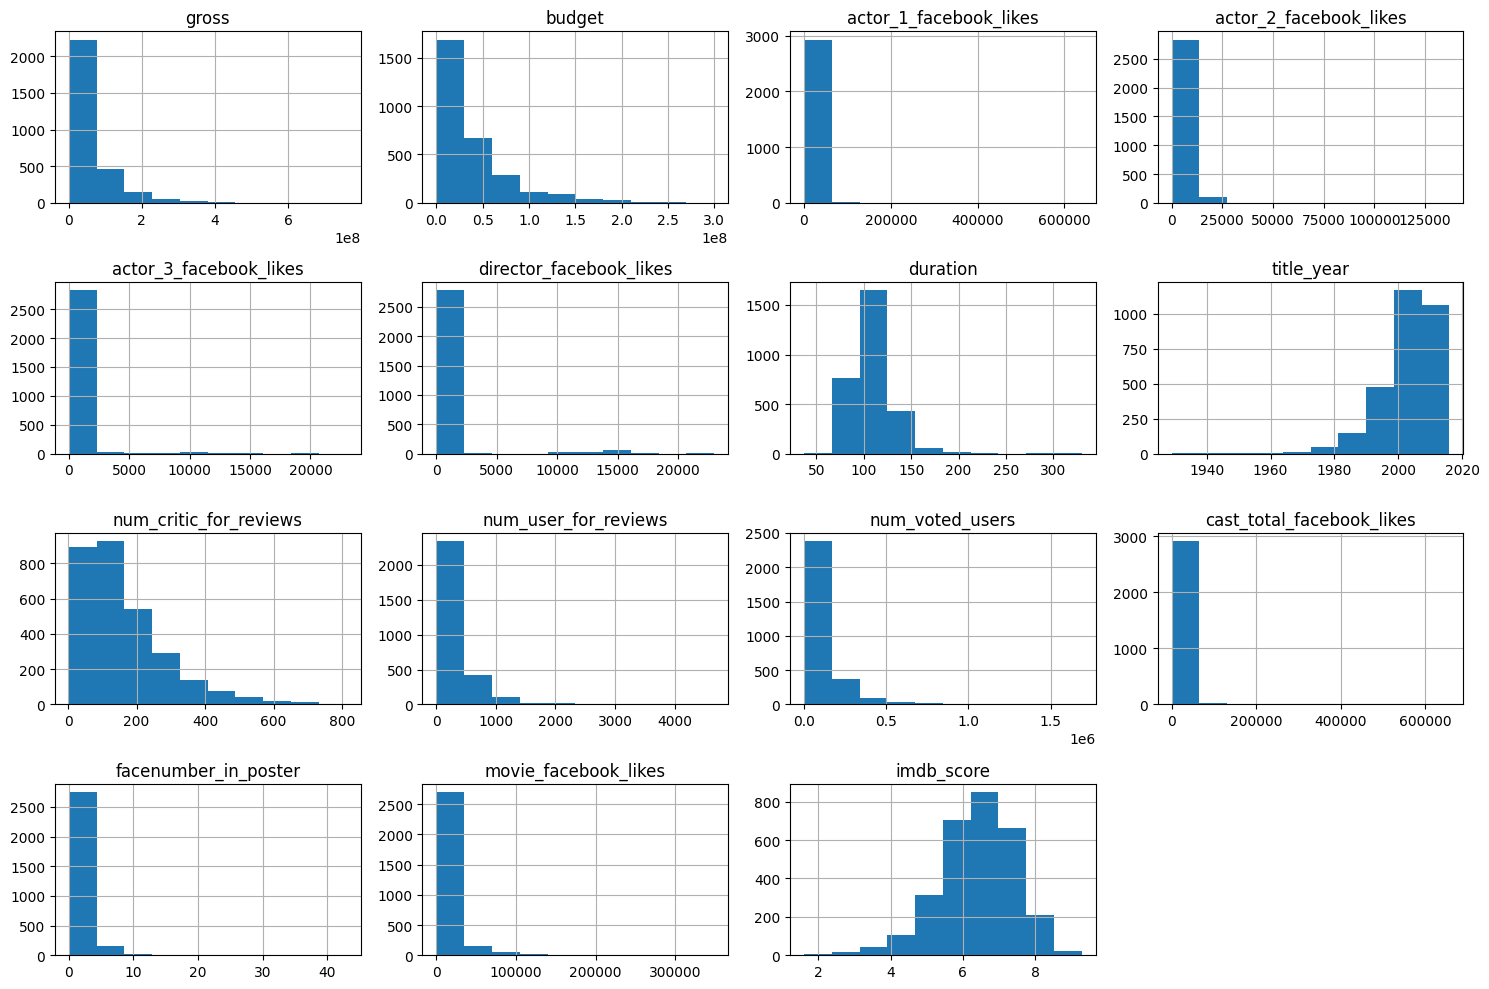

In [162]:
# Create histogram to understand the distribution of numeric values
# Select numeric columns
numeric_columns = movie_data.select_dtypes(include=['number']).columns.tolist()

# Create histograms for numeric columns
movie_data[numeric_columns].hist(figsize=(15, 10))
# Save the figure as a PNG file
plt.savefig('distribution.png', format='png')
plt.tight_layout()
plt.show()

Data indicates significant variability and potential outliers. The distributions are often right-skewed, with means greater than medians, suggesting a few high-value instances influence the averages.

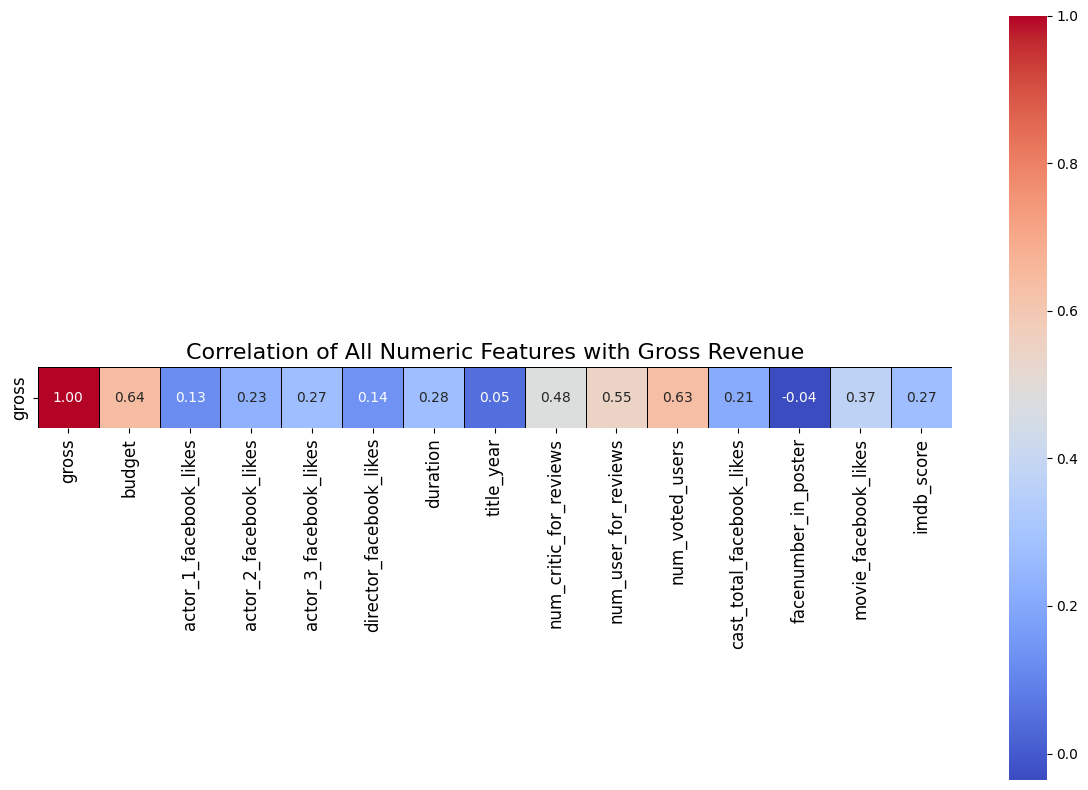

In [163]:
# Use correlation analysis to explore relationships of the features and the gross (target variable)
# Select only numeric columns from the dataset
numeric_data = movie_data.select_dtypes(include=['float64','int64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Select the correlation values specifically with 'profit' and transpose the result for easier visualization
correlation_profit = correlation_matrix[['gross']].T

# Set up the matplotlib figure for the heatmap
plt.figure(figsize=(12, 8))

# Draw a heatmap to visualize the sorted correlation of all features with 'profit'
sns.heatmap(correlation_profit, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar=True, linewidths=0.5, linecolor='black')

# Set the title and adjust font size for clarity
plt.title('Correlation of All Numeric Features with Gross Revenue', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Improve layout for better spacing and display the plot
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('original heatmap.png', format='png')
plt.show()

Features with the highest correlation to gross revenue are budget, number of voted users, and number of user reviews.

# PART III: MACHINE LEARNING MODELS (Linear Regression and Random Forest: Basic and Optimized)

Our metrics are R², MSE, MAE and RMSE because they provide comprehensive view of model performance, guide feature selection, and assist in the model evaluation fo continious values.

# STEP 3.1: MULTIPLE LINEAR REGRESSION MODEL
We started with this model **to establish baseline metrics** for comparison.

For Linear Regression Models StandardScaler seems to be the better choice:
it centers the data around zero and can handle varying scales more effectively.
MinMaxScaler may compress the majority of the data into a small range, which can negatively impact the performance of linear regression.

In [164]:
# To avoid biases and unnecessary information, dropping movie_title from our data before starting our model:
movie_data = movie_data.drop(['movie_title'], axis=1)

In [165]:
# Create a copy of the data
movies_mlr = movie_data.copy()

In [166]:
# List of numerical features to be scaled
numerical_features = ['budget', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                      'actor_3_facebook_likes', 'director_facebook_likes', 'duration',
                      'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users',
                      'cast_total_facebook_likes', 'movie_facebook_likes']

# Set StandardScaler as the best scaler option for Linear regression model
scaler = StandardScaler()
# Scale the numerical columns
movies_mlr[numerical_features] = scaler.fit_transform(movies_mlr[numerical_features])

In [167]:
# Define a list of categorical features
categorical_features = ['genres', 'content_rating', 'language', 'actor_1_name',
                        'actor_2_name', 'actor_3_name', 'director_name',
                        'plot_keywords', 'country', 'color']

In [168]:
# Apply one-hot encoding to the categorical features
movies_mlr = pd.get_dummies(movies_mlr, columns=categorical_features, drop_first=True)

# Set the features and target after encoding
X = movies_mlr.drop(columns=['gross'])  # Independent variables
y = movies_mlr['gross']  # Dependent variable

In [169]:
# Identify numerical columns only in X
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Apply the imputer to the numerical columns
imputer = SimpleImputer(strategy='mean')
X[numerical_columns] = imputer.fit_transform(X[numerical_columns])

In [170]:
# Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

In [171]:
# Assess Multiple Linear Regression Model Accuracy
r2_mlr = r2_score(y_test, y_pred)
mse_mlr = mean_squared_error(y_test, y_pred)
mae_mlr = mean_absolute_error(y_test, y_pred)
rmse_mlr = np.sqrt(mse_mlr)

R-squared, Multiple Linear Regression Model: 0.5811843526898337
Mean Squared Error, Multiple Linear Regression Model: 2146088079719227.5
Mean Absolute Error, Multiple Linear Regression Model: 31743534.21760497
Root Mean Squared Error, Multiple Linear Regression Model: 46325889.95064452


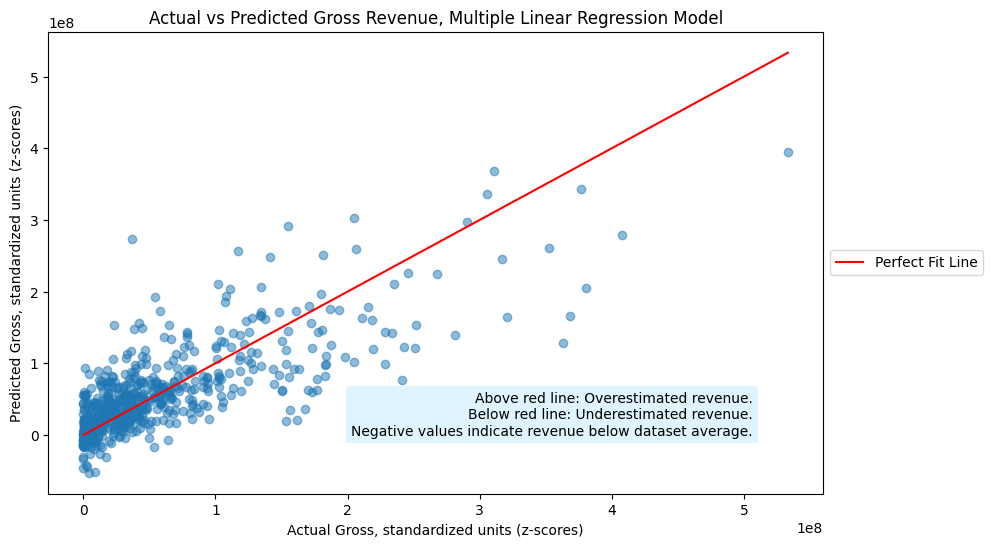

In [172]:
# Print assessment metrics for Multiple Linear Regression Model
print(f'R-squared, Multiple Linear Regression Model: {r2_mlr}')
print(f'Mean Squared Error, Multiple Linear Regression Model: {mse_mlr}')
print(f'Mean Absolute Error, Multiple Linear Regression Model: {mae_mlr}')
print(f'Root Mean Squared Error, Multiple Linear Regression Model: {rmse_mlr}')

# Set plot details to visualise the model performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
# Set Perfect Fit Line in red color
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Perfect Fit Line')
plt.title('Actual vs Predicted Gross Revenue, Multiple Linear Regression Model')
plt.xlabel('Actual Gross, standardized units (z-scores)')
plt.ylabel('Predicted Gross, standardized units (z-scores)')

# Linking the legend to the plot elements and moving it to the center right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=True)

# Adding the text box with additional information and placing it in the lower right
plt.text(max(y_test) * 0.95, min(y_test) * 1.05,
         "Above red line: Overestimated revenue.\n"
         "Below red line: Underestimated revenue.\n"
         "Negative values indicate revenue below dataset average.",
         ha='right', fontsize=10, bbox=dict(facecolor='#cceeff', edgecolor='none', alpha=0.6))

# Save the figure as a PNG file
plt.savefig('Linear Regression.png', format='png')
# Display the plot
plt.show()

**We predicted gross revenue, a continuous variable, using R², MSE, MAE, and RMSE to evaluate this and subsequent models.**

The model explains approximately 58% of the variation in movie revenue based on the included factors, indicating a moderately good fit. However, 42% of the variation remains unexplained, suggesting other influential factors are not captured. The error rate (0.4189) reflects how close predictions are to actual values, but further comparison with other models is needed to assess reliability.

# STEP 3.2. RANDOM FOREST MODEL on the raw data (without optimization)

Based on data size and type, we used Random Forest model with Standard Scaling for Numeric Features and Get_dummies Function for Categorical Values. Random Forest is suitable for complex and non-linear relationships. It also provides insights into feature importance which is one of our key objectives.

In [173]:
# Create a copy of the original cleaned data
movies_brf = movie_data.copy()

# Selecting independable features and target
features = ['budget', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
            'actor_3_facebook_likes', 'director_facebook_likes',
            'duration', 'num_critic_for_reviews', 'num_user_for_reviews',
            'num_voted_users', 'cast_total_facebook_likes',
            'facenumber_in_poster', 'movie_facebook_likes',
            'imdb_score', 'genres', 'content_rating', 'language', 'actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'plot_keywords', 'country', 'color' ]

X = movies_brf[features]
y = movies_brf['gross']

# One-hot encoding categorical columns using pd.get_dummies()
X = pd.get_dummies(X, columns=['genres', 'content_rating', 'language','actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'plot_keywords', 'country', 'color' ], drop_first=True)

# Standard Scaling for numerical columns
numerical_features = ['budget', 'actor_1_facebook_likes', 'actor_2_facebook_likes',
                      'actor_3_facebook_likes', 'director_facebook_likes', 'duration',
                      'num_critic_for_reviews', 'num_user_for_reviews', 'num_voted_users',
                      'cast_total_facebook_likes', 'facenumber_in_poster', 'movie_facebook_likes', 'imdb_score']

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred_brf = model.predict(X_test)

# Model evaluation
r2_brf = r2_score(y_test, y_pred_brf)
mse_brf = mean_squared_error(y_test, y_pred_brf)
mae_brf = mean_absolute_error(y_test, y_pred_brf)
rmse_brf = np.sqrt(mse_brf)

# Print asessment metrics for basic Rando Forest Model
print(f'R^2 Score, basic Random Forest, all features: {r2_brf}')
print(f'Mean Squared Error, basic Random Forest, all features:  {mse_brf}')
print(f'Mean Absolute Error, basic Random Forest, all features: {mae_brf}')
print(f'Root Mean Squared Error, basic Random Forest, all features:  {rmse_brf}')



R^2 Score, basic Random Forest, all features: 0.6797875941774495
Mean Squared Error, basic Random Forest, all features:  1640827011902595.2
Mean Absolute Error, basic Random Forest, all features: 24852675.706146006
Root Mean Squared Error, basic Random Forest, all features:  40507122.97735542


The Random Forest model, which incorporates both categorical and scaled numeric features, achieves a higher R² score of 0.68-0.69, depending on the run, and has a lower MSE compared to the Multiple Linear Regression model. A full comparison will follow.

## This section displays the feature importance of the basic Random Forest model

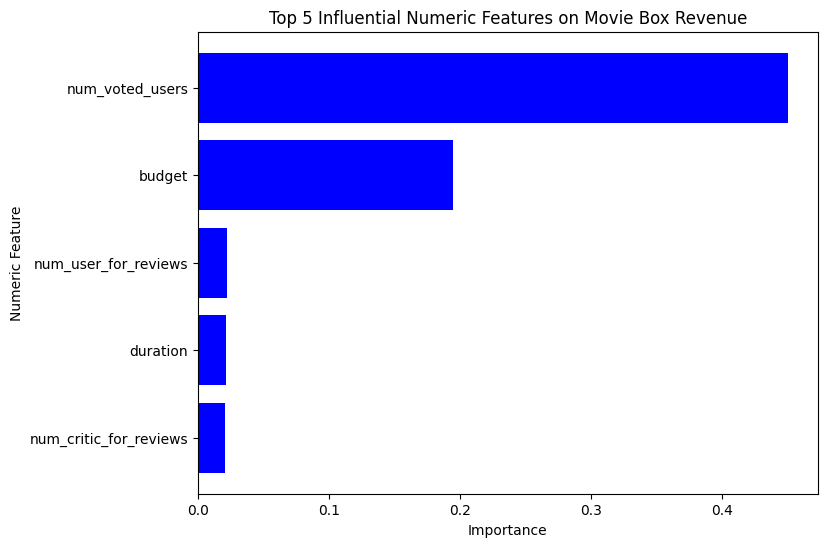

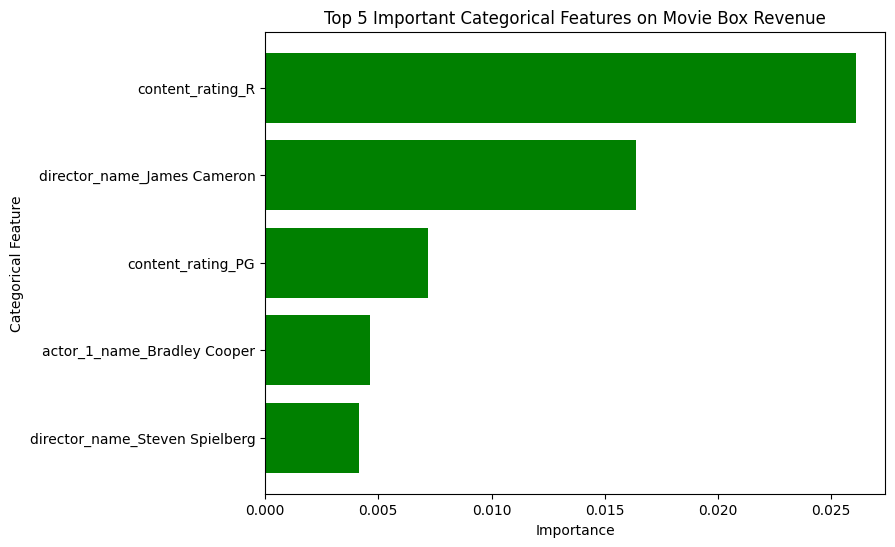

In [174]:
# This code evaluates FEATURE IMPORTANCE for both numerical and categorical features basic Random Forest on raw data
# Extracting feature importances from the model
importances = model.feature_importances_

# Get the correct feature names (if some features were dropped during preprocessing, align them)
if len(importances) == len(X.columns):
    all_feature_names = X.columns
else:
    all_feature_names = X.columns[:len(importances)]  # Adjust if necessary

# Creating a DataFrame for feature importances
features_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})

# Identifying one-hot encoded categorical features based on their prefixes
categorical_encoded_features = [col for col in all_feature_names if any(col.startswith(prefix) for prefix in categorical_features)]

# Identify numeric features (based on columns types 'int64' or 'float64')
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Creating DataFrames for numeric and categorical features
numeric_importance_df = features_importance_df[features_importance_df['Feature'].isin(numeric_features)]
categorical_importance_df = features_importance_df[features_importance_df['Feature'].isin(categorical_encoded_features)]

# Sorting and selecting the top 10 most influential features for each type
top_numeric_features = numeric_importance_df.sort_values(by='Importance', ascending=False).head(5)
top_categorical_features = categorical_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Plotting the top 10 numeric features
plt.figure(figsize=(8, 6))
plt.barh(top_numeric_features['Feature'][::-1], top_numeric_features['Importance'][::-1], color='blue')
plt.xlabel('Importance')
plt.ylabel('Numeric Feature')
plt.title('Top 5 Influential Numeric Features on Movie Box Revenue')
plt.show()

# Plotting the top 10 categorical features
plt.figure(figsize=(8, 6))
plt.barh(top_categorical_features['Feature'][::-1], top_categorical_features['Importance'][::-1], color='green')
plt.xlabel('Importance')
plt.ylabel('Categorical Feature')
plt.title('Top 5 Important Categorical Features on Movie Box Revenue')
plt.show()

**This section displays a combined plot of the top 10 categorical and numerical features to compare their importance to each other.**

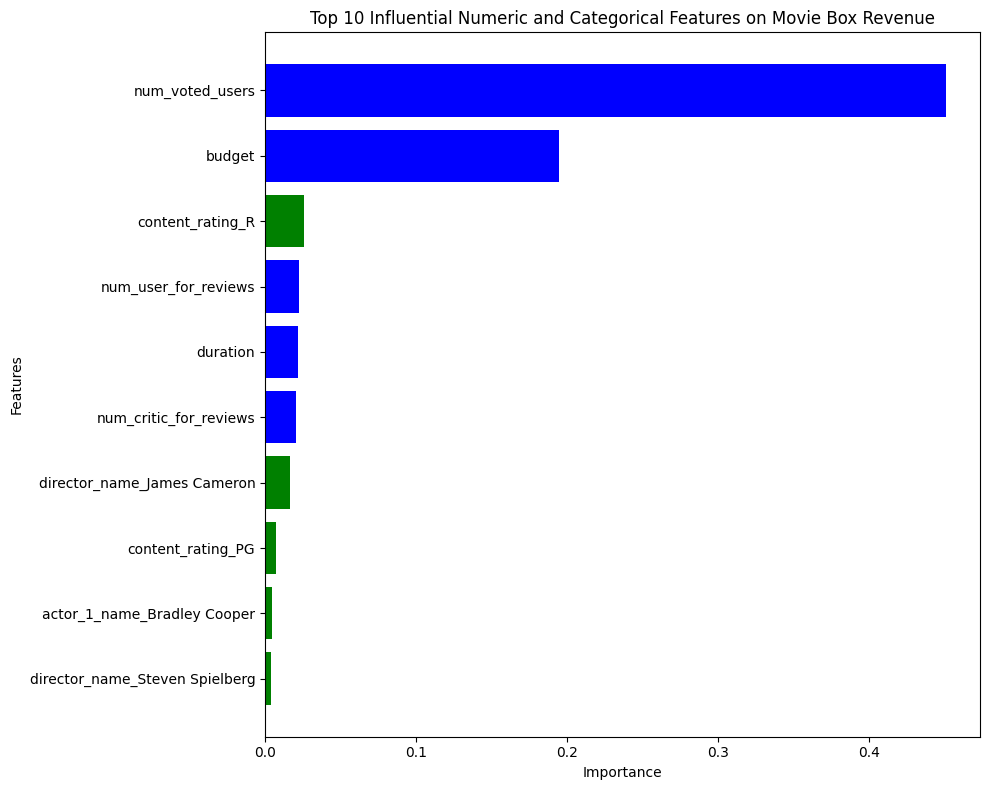

In [175]:
# Creating a DataFrame for feature importances
features_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})

# Identifying one-hot encoded categorical features based on their prefixes
categorical_encoded_features = [col for col in all_feature_names if any(col.startswith(prefix) for prefix in categorical_features)]

# Identify numeric features (columns of type 'int64' or 'float64')
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns

# Creating DataFrames for numeric and categorical features
numeric_importance_df = features_importance_df[features_importance_df['Feature'].isin(numeric_features)]
categorical_importance_df = features_importance_df[features_importance_df['Feature'].isin(categorical_encoded_features)]

# Sorting and selecting the top 10 most influential features for each type
top_numeric_features = numeric_importance_df.sort_values(by='Importance', ascending=False).head(5)
top_categorical_features = categorical_importance_df.sort_values(by='Importance', ascending=False).head(5)

# Concatenating numeric and categorical features
combined_features = pd.concat([top_numeric_features, top_categorical_features])

# Sort by 'Importance' across all features
combined_features = combined_features.sort_values(by='Importance', ascending=False)

# Assign colors: blue for numeric and green for categorical
# Creating a color list where 'blue' corresponds to numeric and 'green' to categorical
combined_features['Color'] = combined_features['Feature'].apply(lambda x: 'blue' if x in numeric_features else 'green')

# Plotting the combined features sorted by Importance
plt.figure(figsize=(10, 8))
plt.barh(combined_features['Feature'][::-1], combined_features['Importance'][::-1], color=combined_features['Color'][::-1])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Influential Numeric and Categorical Features on Movie Box Revenue')
plt.tight_layout()
# Save the figure as a PNG file
plt.savefig('feature importance basic random forest.png', format='png')
plt.show()

In [176]:
# Output the top 10 numeric and categorical features with their importance scores
print("Top 10 Numeric Features and Their Importance Scores:")
print(top_numeric_features)

print("\nTop 10 Categorical Features and Their Importance Scores:")
print(top_categorical_features)

Top 10 Numeric Features and Their Importance Scores:
                  Feature  Importance
8         num_voted_users    0.450920
0                  budget    0.194484
7    num_user_for_reviews    0.022214
5                duration    0.021747
6  num_critic_for_reviews    0.020473

Top 10 Categorical Features and Their Importance Scores:
                             Feature  Importance
667                 content_rating_R    0.026069
6252     director_name_James Cameron    0.016358
664                content_rating_PG    0.007190
806      actor_1_name_Bradley Cooper    0.004632
6986  director_name_Steven Spielberg    0.004165


**Since the basic Random Forest significantly outperformed Multiple Linear Regression, we focused on further optimizing it.**

# STEP 3.3. OPTIMIZED RANDOM FOREST MODEL (feature engineering and selection)
For optimizing it, we rethink our strategy for converting categorical to numerical, create new features, visualize correlation and select features for the model.


In [177]:
# Create a copy of the original cleaned data
movie_orf = movie_data.copy()

In [178]:
# Reassess the conversion of categorical features to numerical
# Perform label encoding for 'content_rating' given the orginal nature
label_encoder = LabelEncoder()
movie_orf['content_rating'] = label_encoder.fit_transform(movie_orf['content_rating'])

# Perform one-hot encoding for 'color' column given the nominal nature
movie_orf = pd.get_dummies(movie_orf, columns=['color'], drop_first=True)

# Convert all boolean columns to integers in the updated DataFrame
movie_orf = movie_orf.apply(lambda x: x.astype(int) if x.dtype == 'bool' else x)

# Display the first five rows of the updated DataFrame
print(movie_orf.head())


         gross       budget  actor_1_name  actor_1_facebook_likes  \
0  760505847.0  237000000.0   CCH Pounder                  1000.0   
1  309404152.0  300000000.0   Johnny Depp                 40000.0   
3  448130642.0  250000000.0     Tom Hardy                 27000.0   
5   73058679.0  263700000.0  Daryl Sabara                   640.0   
6  336530303.0  258000000.0  J.K. Simmons                 24000.0   

       actor_2_name  actor_2_facebook_likes          actor_3_name  \
0  Joel David Moore                   936.0             Wes Studi   
1     Orlando Bloom                  5000.0        Jack Davenport   
3    Christian Bale                 23000.0  Joseph Gordon-Levitt   
5   Samantha Morton                   632.0          Polly Walker   
6      James Franco                 11000.0         Kirsten Dunst   

   actor_3_facebook_likes      director_name  director_facebook_likes  ...  \
0                   855.0      James Cameron                      0.0  ...   
1             

In [179]:
# Get numerical values related to 'actors' and 'director' based on popularity (total FB likes) and create new column for ranks. Reapply the same approach for 'plot key words', 'genre' and 'language' based total count of movies and then create new feature for the rank.
# Consolidate actor likes into total likes
movie_orf['total_actor_likes'] = (
    movie_orf['actor_1_facebook_likes'] +
    movie_orf['actor_2_facebook_likes'] +
    movie_orf['actor_3_facebook_likes']
)

# Total likes for directors
movie_orf['total_director_likes'] = movie_orf['director_facebook_likes']

# Create total count for genres
genre_series = movie_orf['genres'].str.split('|', expand=True).stack()
genre_count = genre_series.value_counts().reset_index()
genre_count.columns = ['genre', 'total_genre_count']

# Reset index for proper merging
movie_orf['genres'] = movie_orf['genres'].str.split('|')
movie_orf = movie_orf.explode('genres')

# Merge genre counts back into movie_orf
movie_orf = movie_orf.merge(genre_count, left_on='genres', right_on='genre', how='left')

# Create total count for languages
language_count = movie_orf['language'].value_counts().reset_index()
language_count.columns = ['language', 'total_language_count']
movie_orf = movie_orf.merge(language_count, on='language', how='left')

# Create total count for plot keywords
plot_keywords_series = movie_orf['plot_keywords'].str.split('|', expand=True).stack()
plot_keywords_count = plot_keywords_series.value_counts().reset_index()
plot_keywords_count.columns = ['plot_keyword', 'total_plot_keyword_count']
movie_orf['plot_keywords'] = movie_orf['plot_keywords'].str.split('|')
movie_orf = movie_orf.explode('plot_keywords').merge(plot_keywords_count, left_on='plot_keywords', right_on='plot_keyword', how='left')

# Check if the columns exist before ranking
if 'total_actor_likes' in movie_orf.columns:
    movie_orf['actor_rank'] = movie_orf['total_actor_likes'].rank(method='min', ascending=False)

if 'total_director_likes' in movie_orf.columns:
    movie_orf['director_rank'] = movie_orf['total_director_likes'].rank(method='min', ascending=False)

if 'total_genre_count' in movie_orf.columns:
    movie_orf['genre_rank'] = movie_orf['total_genre_count'].rank(method='min', ascending=False)

if 'total_language_count' in movie_orf.columns:
    movie_orf['language_rank'] = movie_orf['total_language_count'].rank(method='min', ascending=False)

if 'total_plot_keyword_count' in movie_orf.columns:
    movie_orf['plot_keyword_rank'] = movie_orf['total_plot_keyword_count'].rank(method='min', ascending=False)

# Clean up DataFrame by dropping unnecessary columns
converted_data = movie_orf.drop(columns=[
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'total_director_likes',
    'total_genre_count',
    'total_language_count',
    'total_plot_keyword_count'
], errors='ignore')  # Ignore errors if columns are missing

# Display the updated DataFrame
print(converted_data.head())


         gross       budget actor_1_name      actor_2_name actor_3_name  \
0  760505847.0  237000000.0  CCH Pounder  Joel David Moore    Wes Studi   
1  760505847.0  237000000.0  CCH Pounder  Joel David Moore    Wes Studi   
2  760505847.0  237000000.0  CCH Pounder  Joel David Moore    Wes Studi   
3  760505847.0  237000000.0  CCH Pounder  Joel David Moore    Wes Studi   
4  760505847.0  237000000.0  CCH Pounder  Joel David Moore    Wes Studi   

   director_name  director_facebook_likes  duration  title_year  \
0  James Cameron                      0.0       178        2009   
1  James Cameron                      0.0       178        2009   
2  James Cameron                      0.0       178        2009   
3  James Cameron                      0.0       178        2009   
4  James Cameron                      0.0       178        2009   

   num_critic_for_reviews  ...  imdb_score  color_Color  total_actor_likes  \
0                   723.0  ...         7.9            1             

In [180]:
# Reassess the statistics again since we have new features
summary_statistics = converted_data.describe()
print(summary_statistics)

              gross        budget  director_facebook_likes      duration  \
count  4.341300e+04  4.341300e+04             43413.000000  43413.000000   
mean   6.341413e+07  4.578176e+07               912.735148    109.807016   
std    7.676749e+07  4.589931e+07              3354.653014     22.459886   
min    7.030000e+02  2.180000e+02                 0.000000     37.000000   
25%    1.400000e+07  1.400000e+07                12.000000     95.000000   
50%    3.810508e+07  3.000000e+07                63.000000    106.000000   
75%    8.256953e+07  6.000000e+07               235.000000    119.000000   
max    7.605058e+08  3.000000e+08             23000.000000    330.000000   

        title_year  num_critic_for_reviews  num_user_for_reviews  \
count      43413.0            43413.000000          43413.000000   
mean   2002.839518              167.494115            340.112962   
std         9.9602              125.772128            407.460466   
min         1929.0                2.000000 

In [181]:
# Given the variability and wide distribution, we normalized the data
# List of columns to normalize
columns_to_normalize = [
    'budget', 'director_facebook_likes', 'duration',
    'num_critic_for_reviews', 'num_user_for_reviews',
    'num_voted_users', 'cast_total_facebook_likes',
    'total_actor_likes', 'actor_rank',
    'director_rank', 'genre_rank', 'language_rank', 'plot_keyword_rank'
]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize the specified columns
converted_data[columns_to_normalize] = scaler.fit_transform(converted_data[columns_to_normalize])

# Print summary statistics after normalization
summary_statistics_normalized = converted_data.describe()
print(summary_statistics_normalized)

              gross        budget  director_facebook_likes      duration  \
count  4.341300e+04  43413.000000             43413.000000  43413.000000   
mean   6.341413e+07      0.152605                 0.039684      0.248488   
std    7.676749e+07      0.152998                 0.145854      0.076655   
min    7.030000e+02      0.000000                 0.000000      0.000000   
25%    1.400000e+07      0.046666                 0.000522      0.197952   
50%    3.810508e+07      0.099999                 0.002739      0.235495   
75%    8.256953e+07      0.199999                 0.010217      0.279863   
max    7.605058e+08      1.000000                 1.000000      1.000000   

        title_year  num_critic_for_reviews  num_user_for_reviews  \
count      43413.0            43413.000000          43413.000000   
mean   2002.839518                0.204062              0.072479   
std         9.9602                0.155083              0.087344   
min         1929.0                0.000000 

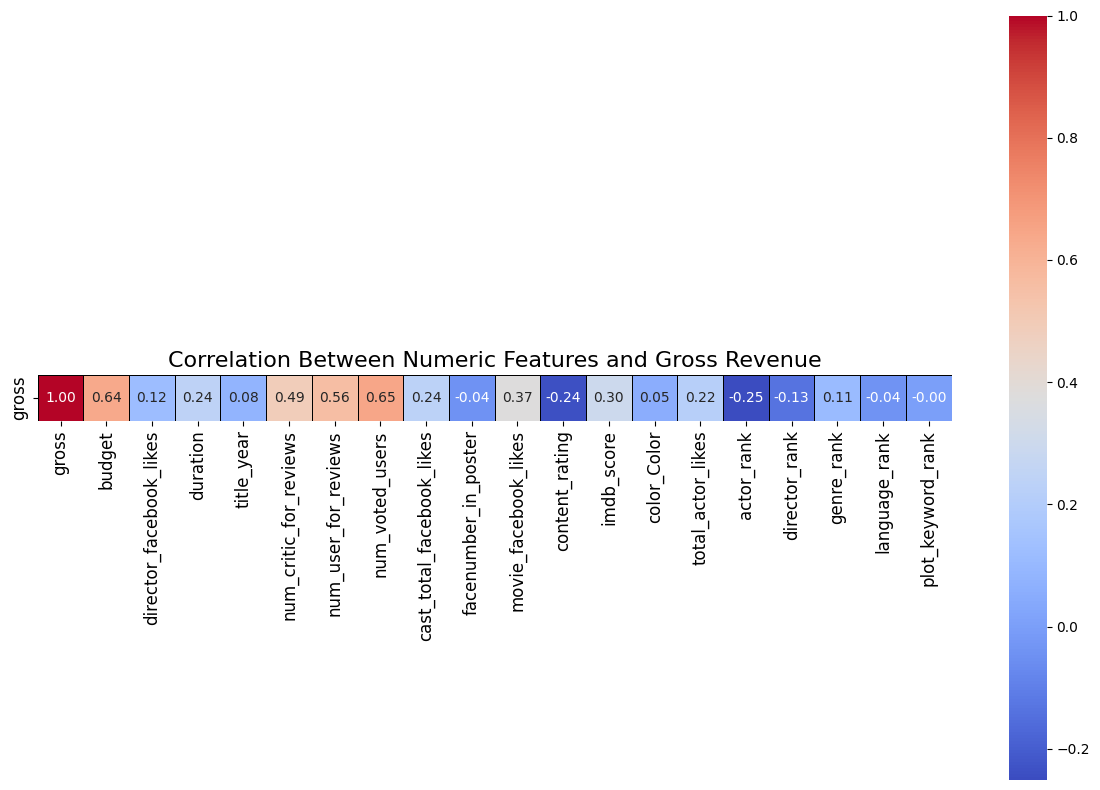

In [182]:
# Run again correlation matrix to see relationship of new features vs the target feature
# Select only numeric columns from the dataset
numeric_data = converted_data.select_dtypes(include=['float64','int64'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_data.corr()

# Select the correlation values specifically with 'profit' and interchange the result for easier visualization
correlation_profit = correlation_matrix[['gross']].T

# Sort the correlations from highest to lowest
sorted_correlation_profit = correlation_profit.sort_values(by='gross', ascending=False)

# Set up the matplotlib figure for the heatmap
plt.figure(figsize=(12, 8))

# Draw a heatmap to visualize the sorted correlation of all features with 'profit'
sns.heatmap(sorted_correlation_profit, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, cbar=True, linewidths=0.5, linecolor='black')

# Set the title and adjust font size for clarity
plt.title('Correlation Between Numeric Features and Gross Revenue', fontsize=16)
plt.xticks(fontsize=12)  # Adjust x-axis font size
plt.yticks(fontsize=12)  # Adjust y-axis font size

# Improve layout for better spacing and display the plot
plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('optimized random forest heatmap.png', format='png')

plt.show()

In [183]:
# Train-Test Split Optimized Random Model
# Feature selection: first, we started with features >.1 those with strong and moderate correlation with 'gross'; and then decided to reduce it features >.3 which helped improved results

features = [
    'budget',
    'num_critic_for_reviews',
    'num_user_for_reviews',
    'num_voted_users',
    'movie_facebook_likes',
    'imdb_score',
]

target = 'gross'

# Splitting the data into features (X) and target (y)
X = converted_data[features]
y = converted_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [184]:
# Train Optimized Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [185]:
# Predictions
orf_predictions = rf_model.predict(X_test)

# Random Forest Evaluation
orf_mse = mean_squared_error(y_test, orf_predictions)
orf_rmse = np.sqrt(orf_mse)
orf_r2 = r2_score(y_test, orf_predictions)
orf_mae = mean_absolute_error(y_test, orf_predictions)

# Print all metrics for Optimized Random Forest Model
print(f'R^2 Score, Optimized Random Forest: {orf_r2}')
print(f'Mean Squared Error, Optimized Random Forest:  {orf_mse}')
print(f'Mean Absolute Error, Optimized Random Forest: {orf_mae}')
print(f'Root Mean Squared Error, Optimized Random Forest:  {orf_rmse}')


R^2 Score, Optimized Random Forest: 0.9999602335332151
Mean Squared Error, Optimized Random Forest:  226307934966.64337
Mean Absolute Error, Optimized Random Forest: 50968.74699182312
Root Mean Squared Error, Optimized Random Forest:  475718.33574778616


This R² score indicates that approximately
99.995% of the variance in the target variable is explained by the model. Such a high R² value suggests that the optimized Random Forest model does an excellent job of fitting the data, meaning it can predict outcomes with very high accuracy.

## Feature Importance for Optimized Random Forest Model:

We created feature importance for the optimized Random Forest to identify the most impactful predictors and gain insights into key performance drivers, guiding decisions on prioritizing factors affecting revenue.

Feature ranking:
1. Feature num_voted_users: 0.5341
2. Feature budget: 0.2155
3. Feature num_user_for_reviews: 0.0864
4. Feature num_critic_for_reviews: 0.0659
5. Feature imdb_score: 0.0526
6. Feature movie_facebook_likes: 0.0455


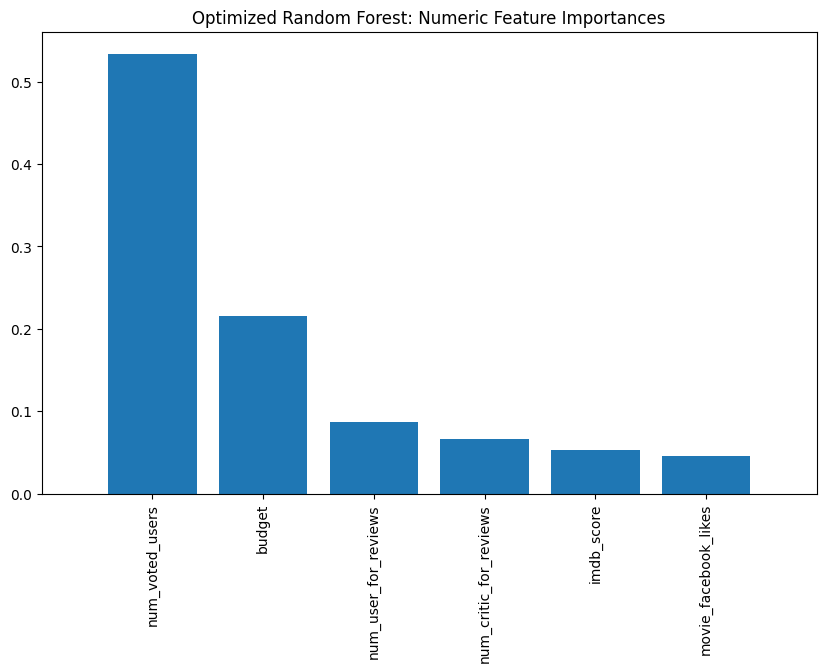

In [186]:
# Get feature importance from the Optimized Random Forest model
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]  # Sort the feature importances in descending order

# Print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. Feature {features[indices[f]]}: {importances[indices[f]]:.4f}")

# Plot the feature importances of the forest
plt.figure(figsize=(10, 6))
plt.title("Optimized Random Forest: Numeric Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), np.array(features)[indices], rotation=90)
plt.xlim([-1, X.shape[1]])

# Save the plot in a png format
plt.savefig('feature importance optimized random forest.png', format='png')
plt.show()

The rankings show that num_voted_users and budget are the strongest predictors of the target variable, based on the features available in our current data.

**We compared training and test data to assess potential overfitting due to the high R² and improved, yet still noticeable, MSE:**

Optimized Random Forest Training MSE: 78395093174.46075
Optimized Random Forest Testing MSE: 226307934966.64337
Optimized Random Forest Training R^2 Score: 0.9999868100904236
Optimized Random Forest Testing R^2 Score: 0.9999602335332151


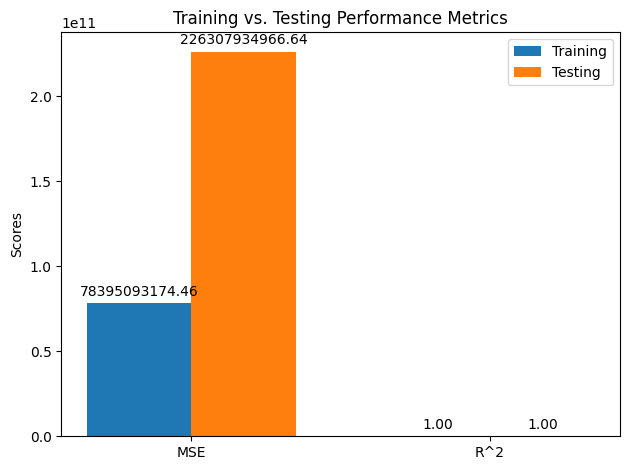

In [187]:
# Perform Train-Test Performance Comparison to verify if model is overfitting given the high R2
# Splitting the data into features (X) and target (y)
X = converted_data[features]
y = converted_data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and fit the model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print metrics
print("Optimized Random Forest Training MSE:", train_mse)
print("Optimized Random Forest Testing MSE:", test_mse)
print("Optimized Random Forest Training R^2 Score:", train_r2)
print("Optimized Random Forest Testing R^2 Score:", test_r2)

# Visualization
metrics = ['MSE', 'R^2']
train_scores = [train_mse, train_r2]
test_scores = [test_mse, test_r2]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Create a bar chart comparing training and testing scores using Matplotlib
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, train_scores, width, label='Training')
bars2 = ax.bar(x + width/2, test_scores, width, label='Testing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Training vs. Testing Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Annotate bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()

# Save the figure as a PNG file
plt.savefig('Train-Test Performance Comparison', format='png')
plt.show()



**After identifying overfitting from the initial graph,** we reduced the features from those with >0.1 correlation to **>0.3**. As a result, R² remained high, and MSE significantly decreased for both training and testing. **The displayed results reflect this optimized feature selection.**


Despite the MSE improvement, the model still shows signs of overfitting, likely due to outliers and the wide gross range (700 to 500M). **To address this, we applied hyperparameter tuning, gradient boosting, and grid search**. Gradient boosting resulted in lower R² with higher MSE, while grid search and tuning had long runtimes with minimal improvement. We removed this code to improve efficiency and eliminate redundancy.

**Recommendations:** limit tree depth, set minimum samples per split/leaf, reduce features per split, increase trees, and use cross-validation to improve testing performance.

# STEP 4: Combine model assessment metrics into a single DataFrame


**Display metrics as a table:**

In [188]:
# Combine R-Squared, MSE, MAE, and RMSE into a DataFrame

model_comparison = pd.DataFrame({
    'Model': [
        'Multiple Linear Regression',
        'Basic Random Forest before optimization',
        'Optimized Random Forest'
    ],
    'R-Squared': [r2_mlr, r2_brf, orf_r2],
    'Mean Squared Error': [mse_mlr, mse_brf, orf_mse],
    'Mean Absolute Error': [mae_mlr, mae_brf, orf_mae],
    'Root Mean Squared Error': [rmse_mlr, rmse_brf, orf_rmse]
})

# Show DataFrame
print(model_comparison)



                                     Model  R-Squared  Mean Squared Error  \
0               Multiple Linear Regression   0.581184        2.146088e+15   
1  Basic Random Forest before optimization   0.679788        1.640827e+15   
2                  Optimized Random Forest   0.999960        2.263079e+11   

   Mean Absolute Error  Root Mean Squared Error  
0         3.174353e+07             4.632589e+07  
1         2.485268e+07             4.050712e+07  
2         5.096875e+04             4.757183e+05  


In [189]:
# Save files to the default Google Colab Directory
model_comparison.to_csv('/content/model_comparison.csv', index=False)

## This section presents plots comparing R², MSE, MAE, and RMSE across different models.
A **logarithmic scale** was used as the disparity between values was too large to be visible in a single plot without it.

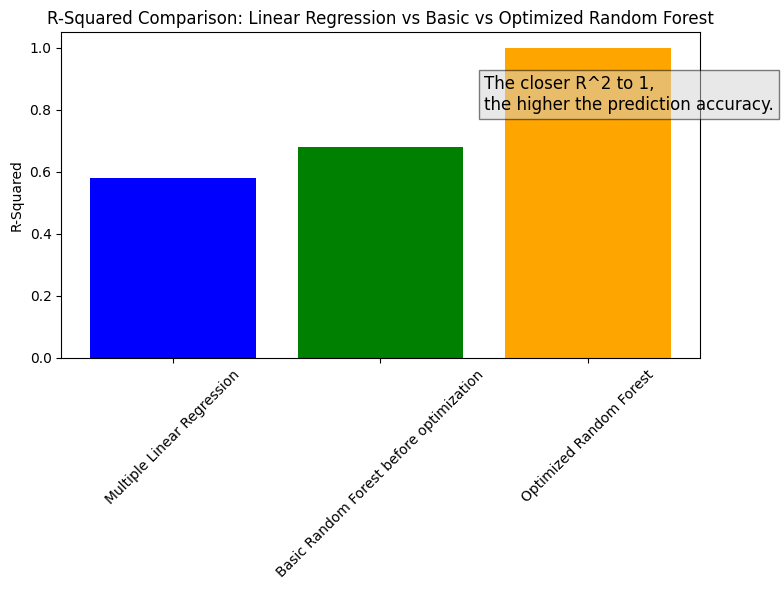

In [190]:
# Plotting R-Squared comparison
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['R-Squared'], color=['blue', 'green', 'orange'])
plt.title('R-Squared Comparison: Linear Regression vs Basic vs Optimized Random Forest')
plt.ylabel('R-Squared')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adding text box on the right center
plt.text(1.5, max(model_comparison['R-Squared']) * 0.8,
         'The closer R^2 to 1,\nthe higher the prediction accuracy.',
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))
# Save the figure in PNG format
plt.savefig('R-squared all model comparison.png', format='png')
# Display the plot
plt.tight_layout()
plt.show()

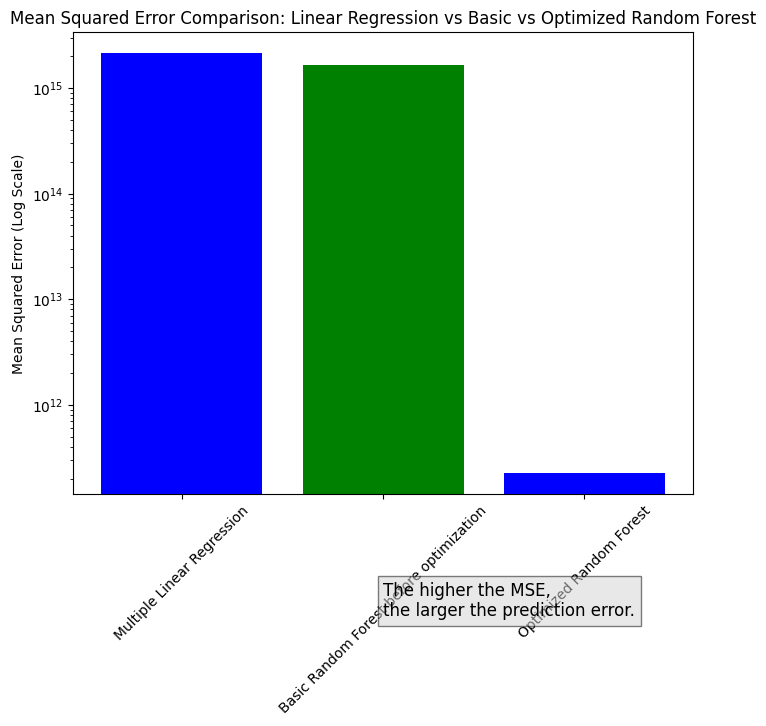

In [191]:
# Plotting Mean Squared Error comparison with a logarithmic scale
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Mean Squared Error'], color=['blue', 'green'])
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.title('Mean Squared Error Comparison: Linear Regression vs Basic vs Optimized Random Forest')
plt.ylabel('Mean Squared Error (Log Scale)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)
# Adding text box with adjusted placement for log scale
plt.text(1, 1e10,  # Adjusted y-value to fit better on the log scale
         'The higher the MSE,\nthe larger the prediction error.',
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Save the figure as a PNG file
plt.savefig('MSE all model comparison.png', format='png')

plt.show()

In [192]:
# Plotting Mean Absolute Error comparison with a logarithmic scale
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Mean Absolute Error'], color=['blue', 'green', 'orange'])
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.title('Mean Absolute Error Comparison: Multiple Linear Regression vs Basic Random Forest')
plt.ylabel('Mean Absolute Error (Log Scale)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adding text box with adjusted placement for log scale
plt.text(1, 1e7,  # Adjusted y-value for better placement
         'The higher the MAE,\nthe larger the prediction error.',
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Save the first figure as a PNG file
plt.savefig('MAE_comparison.png', format='png')

# Close the current figure
plt.close()

# Plotting Root Mean Squared Error comparison with a logarithmic scale
plt.figure(figsize=(8, 6))
plt.bar(model_comparison['Model'], model_comparison['Root Mean Squared Error'], color=['blue', 'green'])
plt.yscale('log')  # Apply logarithmic scale to y-axis
plt.title('Root Mean Squared Error: Multiple Linear Regression vs Basic Random Forest')
plt.ylabel('Root Mean Squared Error (Log Scale)')

# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=45)

# Adding text box with adjusted placement for log scale
plt.text(1, 1e7,  # Adjusted y-value for better placement
         'The higher the RMSE,\nthe larger the prediction error.',
         fontsize=12, bbox=dict(facecolor='lightgray', alpha=0.5))

# Save the second figure as a PNG file
plt.savefig('RMSE_comparison.png', format='png')

# Close the second figure
plt.close()

## Conclusion
**The Optimized Random Forest model outperforms both the Multiple Linear Regression and Basic Random Forest models**. With an R-Squared of 0.999952, it explains nearly all the variance, while the other models show lower values (0.679788 and 0.581184). The optimized model also has much lower MSE, MAE, and RMSE, indicating far more accurate predictions. This demonstrates that optimization significantly improves the model's performance.

Thank you and may the data be with you!